In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def func(r):
    return 0.4 * np.exp(-r*10) + 0.4

In [17]:
r = np.linspace(0, 1, 1000)
omega = func(r)

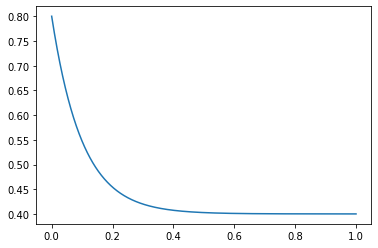

In [18]:
plt.plot(r, omega)

In [61]:
r_obs = np.linspace(0.1, 0.9, 20)
omega_unc = 0.01 * np.ones(len(r_obs))
omega_obs = func(r_obs) + np.random.randn(len(r_obs)) * omega_unc
omega_obs = omega_obs.flatten()

<ErrorbarContainer object of 3 artists>

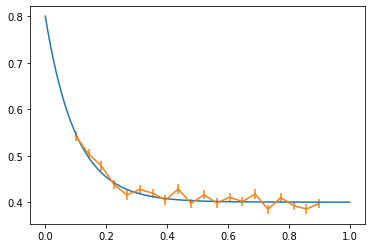

In [62]:
plt.plot(r, omega)
plt.errorbar(r_obs, omega_obs, yerr=omega_unc)


In [63]:
n_param = 50
x = np.linspace(0.05, 1.0, n_param)

In [64]:
def kernel(x, y, p):
    # p[0] = sigma
    # p[1] = length scale
    return p[0]**2 * np.exp(-0.5 * np.subtract.outer(x, y)**2 / p[1]**2)

In [172]:
def like(y1, A):
    return (2.0 * np.pi * np.linalg.det(A))**-0.5 * np.exp(-0.5 * np.dot(y1, np.linalg.inv(A).dot(y1)))

def lnlike(y1, A):
    return -0.5 * np.log(2.0 * np.pi * np.linalg.det(A)) + (-0.5 * np.dot(y1, np.linalg.inv(A).dot(y1)))

In [258]:
def predict(t_2, t_1, kernel, p, y_1):
    B = kernel(t_1, t_2, p).T
    C = kernel(t_2, t_2, p)
    A = kernel(t_1, t_1, p)
    Ainv = np.linalg.inv(A)
    y_pred = np.dot(B, Ainv).dot(y_1)
    sigma_new = C - np.dot(B, Ainv).dot(B.T)
    print(lnlike(y_1, A))
    return y_pred, sigma_new.diagonal()

In [291]:
theta = (np.random.randn(n_param) * 0.2)**2
theta = np.sort(theta)[::-1]
p = [1.0, 2.0]
mean = 0.0
y_mean, sigma = predict(r_obs*100, x*100, kernel, p, theta)

17.455785891274477


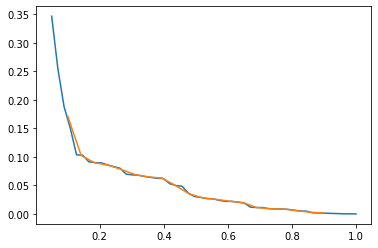

In [285]:
plt.plot(x, theta)
plt.plot(r_obs, y_mean)

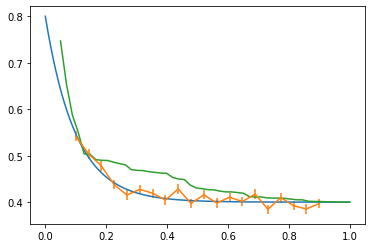

In [286]:
plt.plot(r, omega)
plt.errorbar(r_obs, omega_obs, yerr=omega_unc)
plt.plot(x, theta + mean)

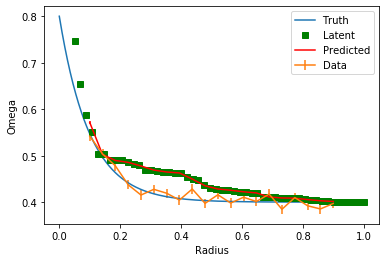

In [288]:
plt.plot(r, omega, label='Truth')
plt.errorbar(r_obs, omega_obs, yerr=omega_unc, label='Data')
plt.plot(x, theta + mean, 'gs', label='Latent')
plt.plot(r_obs, y_mean + mean, 'r-', label='Predicted')
plt.errorbar(r_obs, y_mean + mean, yerr=sigma, c='r', linestyle='none')
plt.xlabel('Radius')
plt.ylabel('Omega')
plt.legend()
plt.savefig('tmp.png')